In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


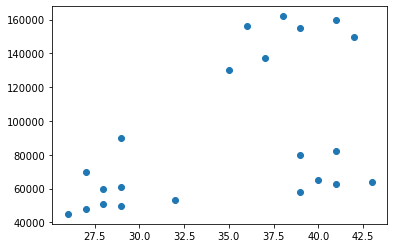

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(df["Age"], df["Income($)"])

In [45]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

In [46]:
y_predicted = model.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [47]:
df["Cluster"] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


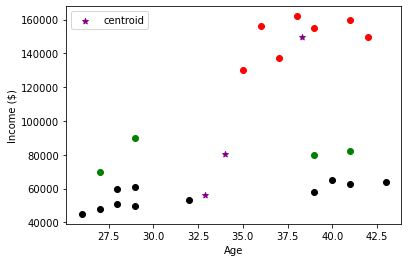

In [48]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [50]:
scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [52]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [53]:
df["Cluster"] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


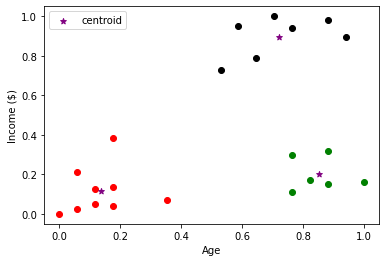

In [54]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [56]:
sse = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(df[["Age", "Income($)"]])
    sse.append(model.inertia_)
    
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668415,
 0.22476961228772668,
 0.18311629202780538,
 0.13762504146528043,
 0.10188787724979427]

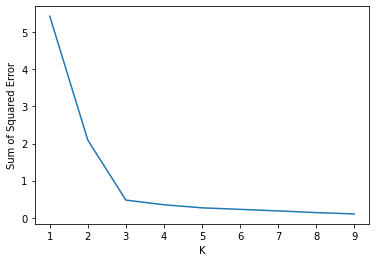

In [58]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(range(1, 10), sse)